In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [6]:

#load the dataset
iris_data = pd.DataFrame(data=datasets.load_iris()['data'], columns=datasets.load_iris()['feature_names'])
iris_data['Species'] = datasets.load_iris()['target']

In [10]:
#eda
iris_data.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

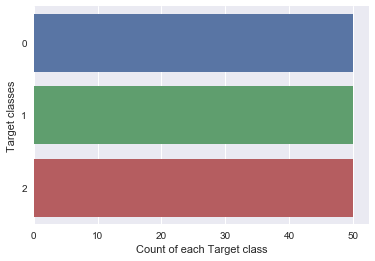

In [14]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

Early Insights :

150 rows

4 Independent variables to act as factors

All have same units of measurement (cm)

No missing data

Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'

No class imbalance, all target classes have equal number of rows (50 each).


-----------------------------
Bivariate EDA

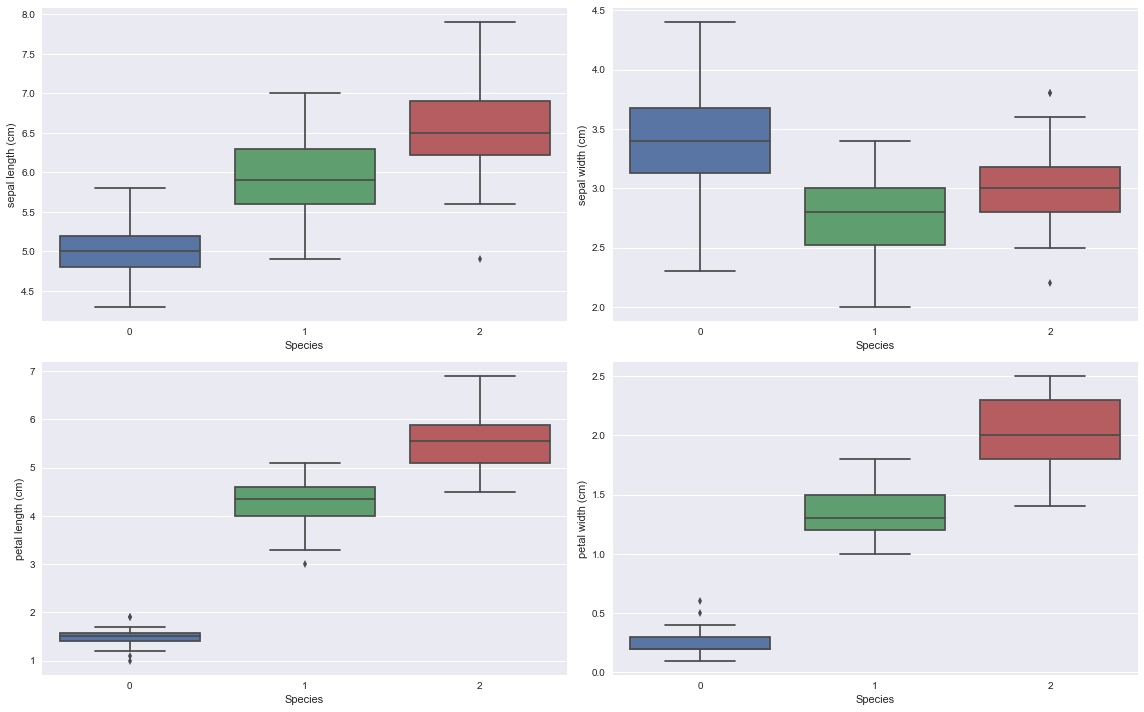

In [15]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()


In [18]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Implement PCA

In [22]:
X = iris_data[datasets.load_iris()['feature_names']]
y = iris_data['Species']

from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)


In [23]:
pca.get_covariance()


array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [24]:

explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

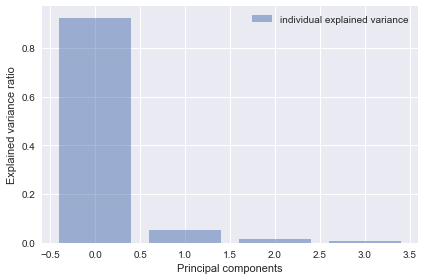

In [25]:
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [26]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)


In [27]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)


In [28]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %
